MNIST code is from https://github.com/pytorch/examples/blob/master/mnist/main.py

In [160]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [161]:
torch.manual_seed(42)
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [162]:
train_kwargs = {'batch_size': 64}
test_kwargs = {'batch_size': 1000}
if use_cuda:
    cuda_kwargs = {'num_workers': 1,
                   'pin_memory': True,
                   'shuffle': True}
    train_kwargs.update(cuda_kwargs)
    test_kwargs.update(cuda_kwargs)

In [163]:
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

In [164]:
dataset1 = datasets.MNIST('../data', train=True, download=True,
                   transform=transform)
dataset2 = datasets.MNIST('../data', train=False,
                   transform=transform)

In [165]:
train_loader = torch.utils.data.DataLoader(dataset1,**train_kwargs)
test_loader = torch.utils.data.DataLoader(dataset2, **test_kwargs)

In [166]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

In [167]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

In [168]:
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [169]:
model = Net().to(device)
optimizer = optim.Adadelta(model.parameters(), lr=1.0)
scheduler = StepLR(optimizer, step_size=1, gamma=0.7)

In [170]:
for epoch in range(1, 14 + 1):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)
    scheduler.step()

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.303158
Train Epoch: 1 [640/60000 (1%)]	Loss: 1.817712
Train Epoch: 1 [1280/60000 (2%)]	Loss: 0.853938
Train Epoch: 1 [1920/60000 (3%)]	Loss: 0.366692
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.595887
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.465193
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.511740
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.496014
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.266415
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.237527
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.331228
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.321780
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.099750
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.170012
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.326170
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.226952
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.080653
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.289126
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.147617
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.206398
Train Epoch: 1 [12800/60000 (

Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.049194
Train Epoch: 2 [45440/60000 (76%)]	Loss: 0.071237
Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.020742
Train Epoch: 2 [46720/60000 (78%)]	Loss: 0.017707
Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.026520
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.076950
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.076090
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.072807
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.024636
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.061618
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.028154
Train Epoch: 2 [51840/60000 (86%)]	Loss: 0.063229
Train Epoch: 2 [52480/60000 (87%)]	Loss: 0.004114
Train Epoch: 2 [53120/60000 (88%)]	Loss: 0.061571
Train Epoch: 2 [53760/60000 (90%)]	Loss: 0.047644
Train Epoch: 2 [54400/60000 (91%)]	Loss: 0.075434
Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.026158
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.220949
Train Epoch: 2 [56320/60000 (94%)]	Loss: 0.127739
Train Epoch: 2 [56960/60000 (95%)]	Loss: 0.308967


Train Epoch: 4 [30080/60000 (50%)]	Loss: 0.033247
Train Epoch: 4 [30720/60000 (51%)]	Loss: 0.023386
Train Epoch: 4 [31360/60000 (52%)]	Loss: 0.017928
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.091616
Train Epoch: 4 [32640/60000 (54%)]	Loss: 0.022577
Train Epoch: 4 [33280/60000 (55%)]	Loss: 0.016620
Train Epoch: 4 [33920/60000 (57%)]	Loss: 0.108753
Train Epoch: 4 [34560/60000 (58%)]	Loss: 0.151071
Train Epoch: 4 [35200/60000 (59%)]	Loss: 0.032809
Train Epoch: 4 [35840/60000 (60%)]	Loss: 0.025881
Train Epoch: 4 [36480/60000 (61%)]	Loss: 0.003820
Train Epoch: 4 [37120/60000 (62%)]	Loss: 0.012653
Train Epoch: 4 [37760/60000 (63%)]	Loss: 0.021940
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.002872
Train Epoch: 4 [39040/60000 (65%)]	Loss: 0.017392
Train Epoch: 4 [39680/60000 (66%)]	Loss: 0.012718
Train Epoch: 4 [40320/60000 (67%)]	Loss: 0.022681
Train Epoch: 4 [40960/60000 (68%)]	Loss: 0.023312
Train Epoch: 4 [41600/60000 (69%)]	Loss: 0.043023
Train Epoch: 4 [42240/60000 (70%)]	Loss: 0.053090


Train Epoch: 6 [15360/60000 (26%)]	Loss: 0.111020
Train Epoch: 6 [16000/60000 (27%)]	Loss: 0.004751
Train Epoch: 6 [16640/60000 (28%)]	Loss: 0.001086
Train Epoch: 6 [17280/60000 (29%)]	Loss: 0.079639
Train Epoch: 6 [17920/60000 (30%)]	Loss: 0.003972
Train Epoch: 6 [18560/60000 (31%)]	Loss: 0.016496
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.002663
Train Epoch: 6 [19840/60000 (33%)]	Loss: 0.005940
Train Epoch: 6 [20480/60000 (34%)]	Loss: 0.013974
Train Epoch: 6 [21120/60000 (35%)]	Loss: 0.009622
Train Epoch: 6 [21760/60000 (36%)]	Loss: 0.110291
Train Epoch: 6 [22400/60000 (37%)]	Loss: 0.037965
Train Epoch: 6 [23040/60000 (38%)]	Loss: 0.011682
Train Epoch: 6 [23680/60000 (39%)]	Loss: 0.001945
Train Epoch: 6 [24320/60000 (41%)]	Loss: 0.078555
Train Epoch: 6 [24960/60000 (42%)]	Loss: 0.025832
Train Epoch: 6 [25600/60000 (43%)]	Loss: 0.013725
Train Epoch: 6 [26240/60000 (44%)]	Loss: 0.042965
Train Epoch: 6 [26880/60000 (45%)]	Loss: 0.024476
Train Epoch: 6 [27520/60000 (46%)]	Loss: 0.007640



Test set: Average loss: 0.0258, Accuracy: 9921/10000 (99%)

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.007006
Train Epoch: 8 [640/60000 (1%)]	Loss: 0.080426
Train Epoch: 8 [1280/60000 (2%)]	Loss: 0.002749
Train Epoch: 8 [1920/60000 (3%)]	Loss: 0.042656
Train Epoch: 8 [2560/60000 (4%)]	Loss: 0.024178
Train Epoch: 8 [3200/60000 (5%)]	Loss: 0.002604
Train Epoch: 8 [3840/60000 (6%)]	Loss: 0.013135
Train Epoch: 8 [4480/60000 (7%)]	Loss: 0.002408
Train Epoch: 8 [5120/60000 (9%)]	Loss: 0.003339
Train Epoch: 8 [5760/60000 (10%)]	Loss: 0.006250
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.000488
Train Epoch: 8 [7040/60000 (12%)]	Loss: 0.090279
Train Epoch: 8 [7680/60000 (13%)]	Loss: 0.002506
Train Epoch: 8 [8320/60000 (14%)]	Loss: 0.006416
Train Epoch: 8 [8960/60000 (15%)]	Loss: 0.008797
Train Epoch: 8 [9600/60000 (16%)]	Loss: 0.001934
Train Epoch: 8 [10240/60000 (17%)]	Loss: 0.011650
Train Epoch: 8 [10880/60000 (18%)]	Loss: 0.050410
Train Epoch: 8 [11520/60000 (19%)]	Loss: 0.073589
Train Epoch: 8 [12

Train Epoch: 9 [44160/60000 (74%)]	Loss: 0.012309
Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.007211
Train Epoch: 9 [45440/60000 (76%)]	Loss: 0.007695
Train Epoch: 9 [46080/60000 (77%)]	Loss: 0.032889
Train Epoch: 9 [46720/60000 (78%)]	Loss: 0.000413
Train Epoch: 9 [47360/60000 (79%)]	Loss: 0.041470
Train Epoch: 9 [48000/60000 (80%)]	Loss: 0.001106
Train Epoch: 9 [48640/60000 (81%)]	Loss: 0.000945
Train Epoch: 9 [49280/60000 (82%)]	Loss: 0.000666
Train Epoch: 9 [49920/60000 (83%)]	Loss: 0.003273
Train Epoch: 9 [50560/60000 (84%)]	Loss: 0.009082
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.000211
Train Epoch: 9 [51840/60000 (86%)]	Loss: 0.034636
Train Epoch: 9 [52480/60000 (87%)]	Loss: 0.023994
Train Epoch: 9 [53120/60000 (88%)]	Loss: 0.003351
Train Epoch: 9 [53760/60000 (90%)]	Loss: 0.013092
Train Epoch: 9 [54400/60000 (91%)]	Loss: 0.008032
Train Epoch: 9 [55040/60000 (92%)]	Loss: 0.000509
Train Epoch: 9 [55680/60000 (93%)]	Loss: 0.003916
Train Epoch: 9 [56320/60000 (94%)]	Loss: 0.087584


Train Epoch: 11 [26240/60000 (44%)]	Loss: 0.005381
Train Epoch: 11 [26880/60000 (45%)]	Loss: 0.055507
Train Epoch: 11 [27520/60000 (46%)]	Loss: 0.000784
Train Epoch: 11 [28160/60000 (47%)]	Loss: 0.000265
Train Epoch: 11 [28800/60000 (48%)]	Loss: 0.019285
Train Epoch: 11 [29440/60000 (49%)]	Loss: 0.029781
Train Epoch: 11 [30080/60000 (50%)]	Loss: 0.002672
Train Epoch: 11 [30720/60000 (51%)]	Loss: 0.129576
Train Epoch: 11 [31360/60000 (52%)]	Loss: 0.007858
Train Epoch: 11 [32000/60000 (53%)]	Loss: 0.004959
Train Epoch: 11 [32640/60000 (54%)]	Loss: 0.025219
Train Epoch: 11 [33280/60000 (55%)]	Loss: 0.020527
Train Epoch: 11 [33920/60000 (57%)]	Loss: 0.051479
Train Epoch: 11 [34560/60000 (58%)]	Loss: 0.073097
Train Epoch: 11 [35200/60000 (59%)]	Loss: 0.009107
Train Epoch: 11 [35840/60000 (60%)]	Loss: 0.073928
Train Epoch: 11 [36480/60000 (61%)]	Loss: 0.074232
Train Epoch: 11 [37120/60000 (62%)]	Loss: 0.009282
Train Epoch: 11 [37760/60000 (63%)]	Loss: 0.013922
Train Epoch: 11 [38400/60000 (6

Train Epoch: 13 [9600/60000 (16%)]	Loss: 0.010333
Train Epoch: 13 [10240/60000 (17%)]	Loss: 0.018682
Train Epoch: 13 [10880/60000 (18%)]	Loss: 0.003440
Train Epoch: 13 [11520/60000 (19%)]	Loss: 0.004995
Train Epoch: 13 [12160/60000 (20%)]	Loss: 0.040894
Train Epoch: 13 [12800/60000 (21%)]	Loss: 0.048277
Train Epoch: 13 [13440/60000 (22%)]	Loss: 0.015551
Train Epoch: 13 [14080/60000 (23%)]	Loss: 0.002167
Train Epoch: 13 [14720/60000 (25%)]	Loss: 0.001204
Train Epoch: 13 [15360/60000 (26%)]	Loss: 0.002055
Train Epoch: 13 [16000/60000 (27%)]	Loss: 0.004871
Train Epoch: 13 [16640/60000 (28%)]	Loss: 0.001865
Train Epoch: 13 [17280/60000 (29%)]	Loss: 0.016977
Train Epoch: 13 [17920/60000 (30%)]	Loss: 0.015738
Train Epoch: 13 [18560/60000 (31%)]	Loss: 0.001897
Train Epoch: 13 [19200/60000 (32%)]	Loss: 0.061123
Train Epoch: 13 [19840/60000 (33%)]	Loss: 0.013565
Train Epoch: 13 [20480/60000 (34%)]	Loss: 0.006998
Train Epoch: 13 [21120/60000 (35%)]	Loss: 0.027373
Train Epoch: 13 [21760/60000 (36

Train Epoch: 14 [53120/60000 (88%)]	Loss: 0.030808
Train Epoch: 14 [53760/60000 (90%)]	Loss: 0.014496
Train Epoch: 14 [54400/60000 (91%)]	Loss: 0.016467
Train Epoch: 14 [55040/60000 (92%)]	Loss: 0.005003
Train Epoch: 14 [55680/60000 (93%)]	Loss: 0.039831
Train Epoch: 14 [56320/60000 (94%)]	Loss: 0.008737
Train Epoch: 14 [56960/60000 (95%)]	Loss: 0.008066
Train Epoch: 14 [57600/60000 (96%)]	Loss: 0.063390
Train Epoch: 14 [58240/60000 (97%)]	Loss: 0.010888
Train Epoch: 14 [58880/60000 (98%)]	Loss: 0.036063
Train Epoch: 14 [59520/60000 (99%)]	Loss: 0.075385

Test set: Average loss: 0.0259, Accuracy: 9923/10000 (99%)



In [171]:
import shap
import numpy as np

In [172]:
# Load a batch of examples from the training data. Can do this through iterator...
for data, target in train_loader:
    break

In [173]:
background = data
e = shap.DeepExplainer(model, background.to(device))
for tdata, _ in test_loader:
    break
shap_values = e.shap_values(tdata[1:5].to(device))

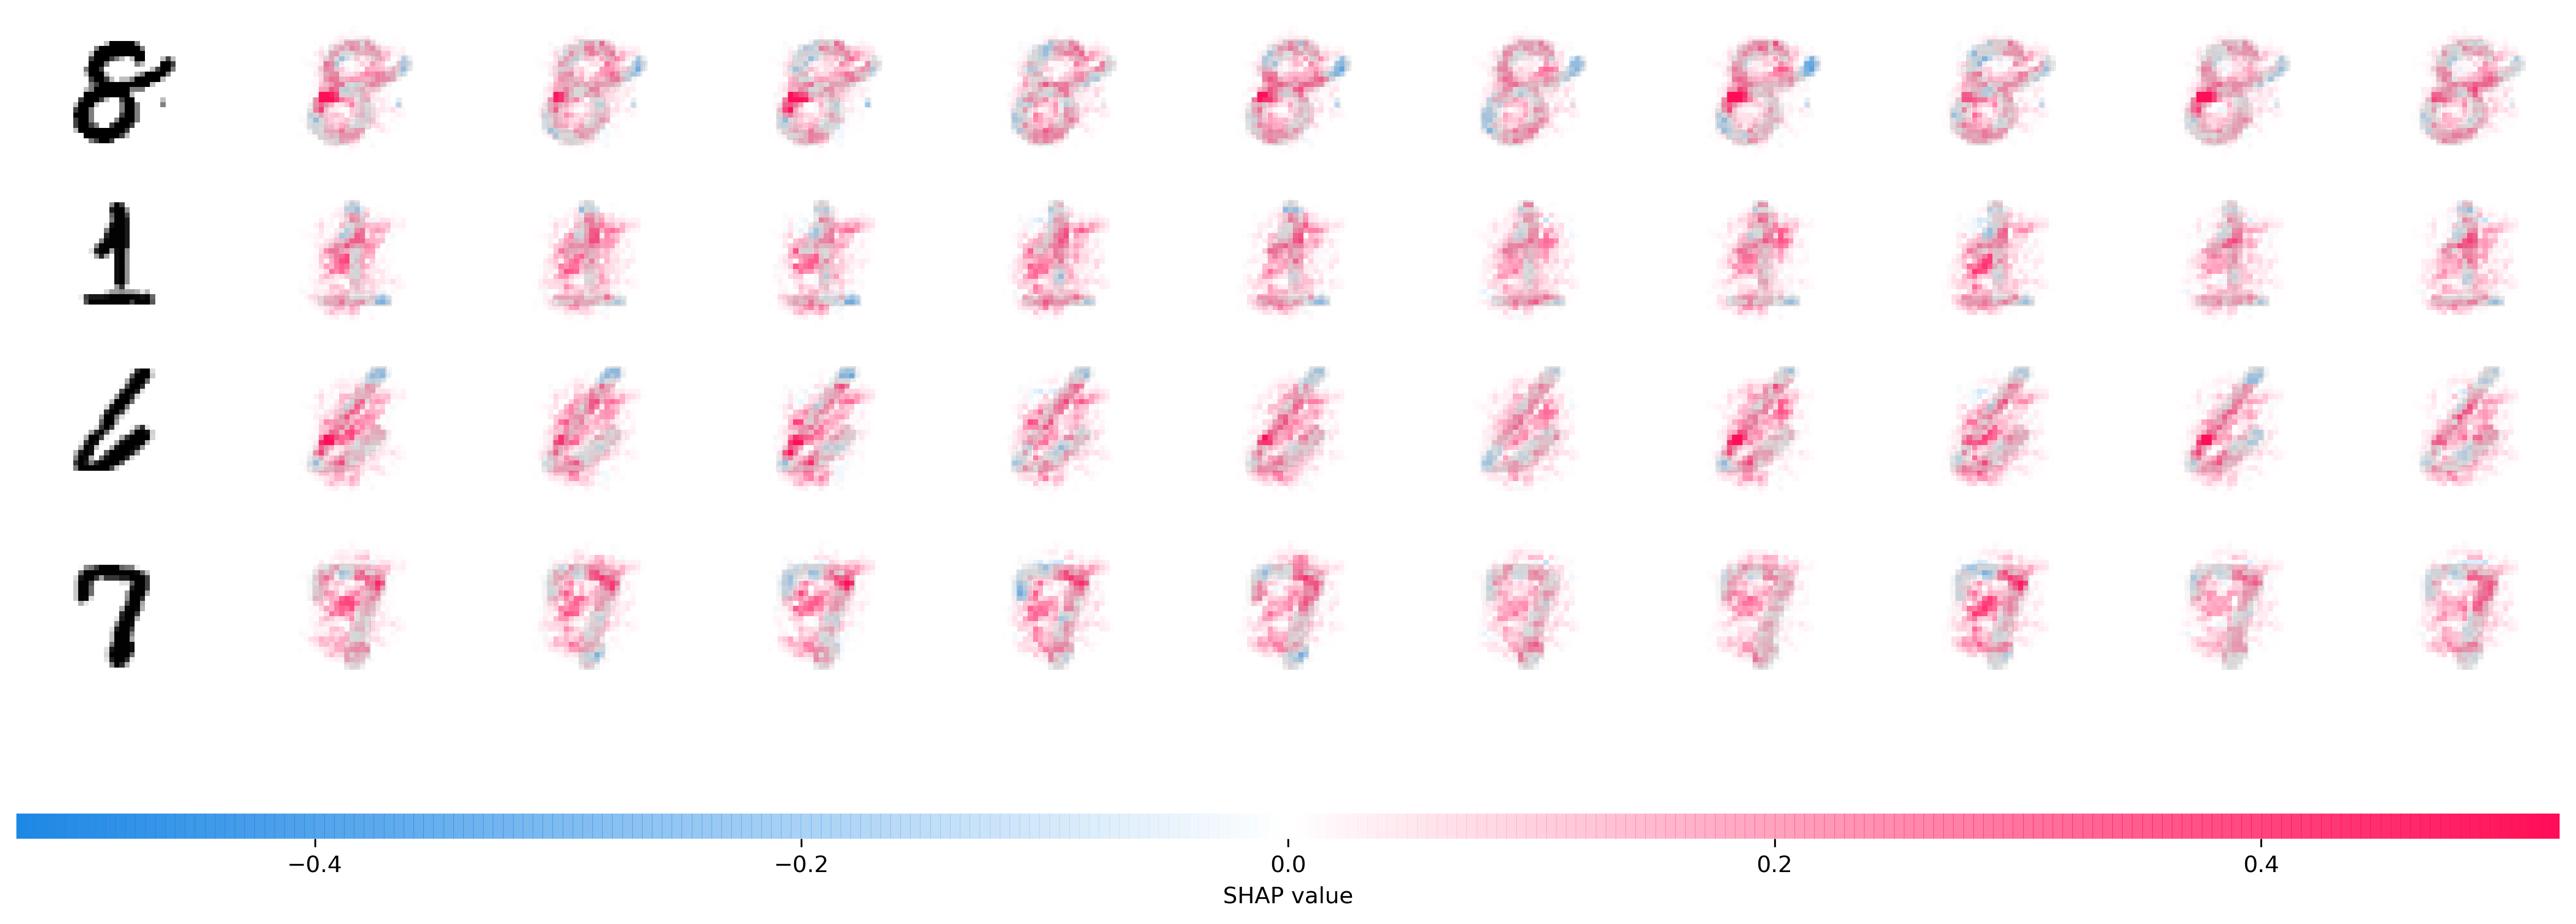

In [174]:
shap_values = [np.swapaxes(np.swapaxes(s, 1, -1), 1, 2) for s in shap_values]
tdata = np.swapaxes(np.swapaxes(tdata[1:5].cpu().numpy(), 1, -1), 1, 2)
#shap.image_plot(list(np.array(shap_values).reshape(10, 4, 28, 28, 1)), np.array(-tdata[1:5]).reshape(4, 28, 28, 1))
shap.image_plot(shap_values, -tdata)

In [175]:
images = background.to(device)
to_explain = images[[3, 12, 18, 22]]
e = shap.GradientExplainer((model, model.conv1), images)
shap_values,indexes = e.shap_values(to_explain, ranked_outputs=4, nsamples=200)

In [176]:
class_names= ["zero", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine"]
index_names = np.vectorize(lambda x: class_names[x])(indexes.cpu().numpy())

shap_values = [np.swapaxes(np.swapaxes(s, 1, -1), 1, 2) for s in shap_values]
to_explain = np.swapaxes(np.swapaxes(to_explain.cpu().numpy(), 1, -1), 1, 2)

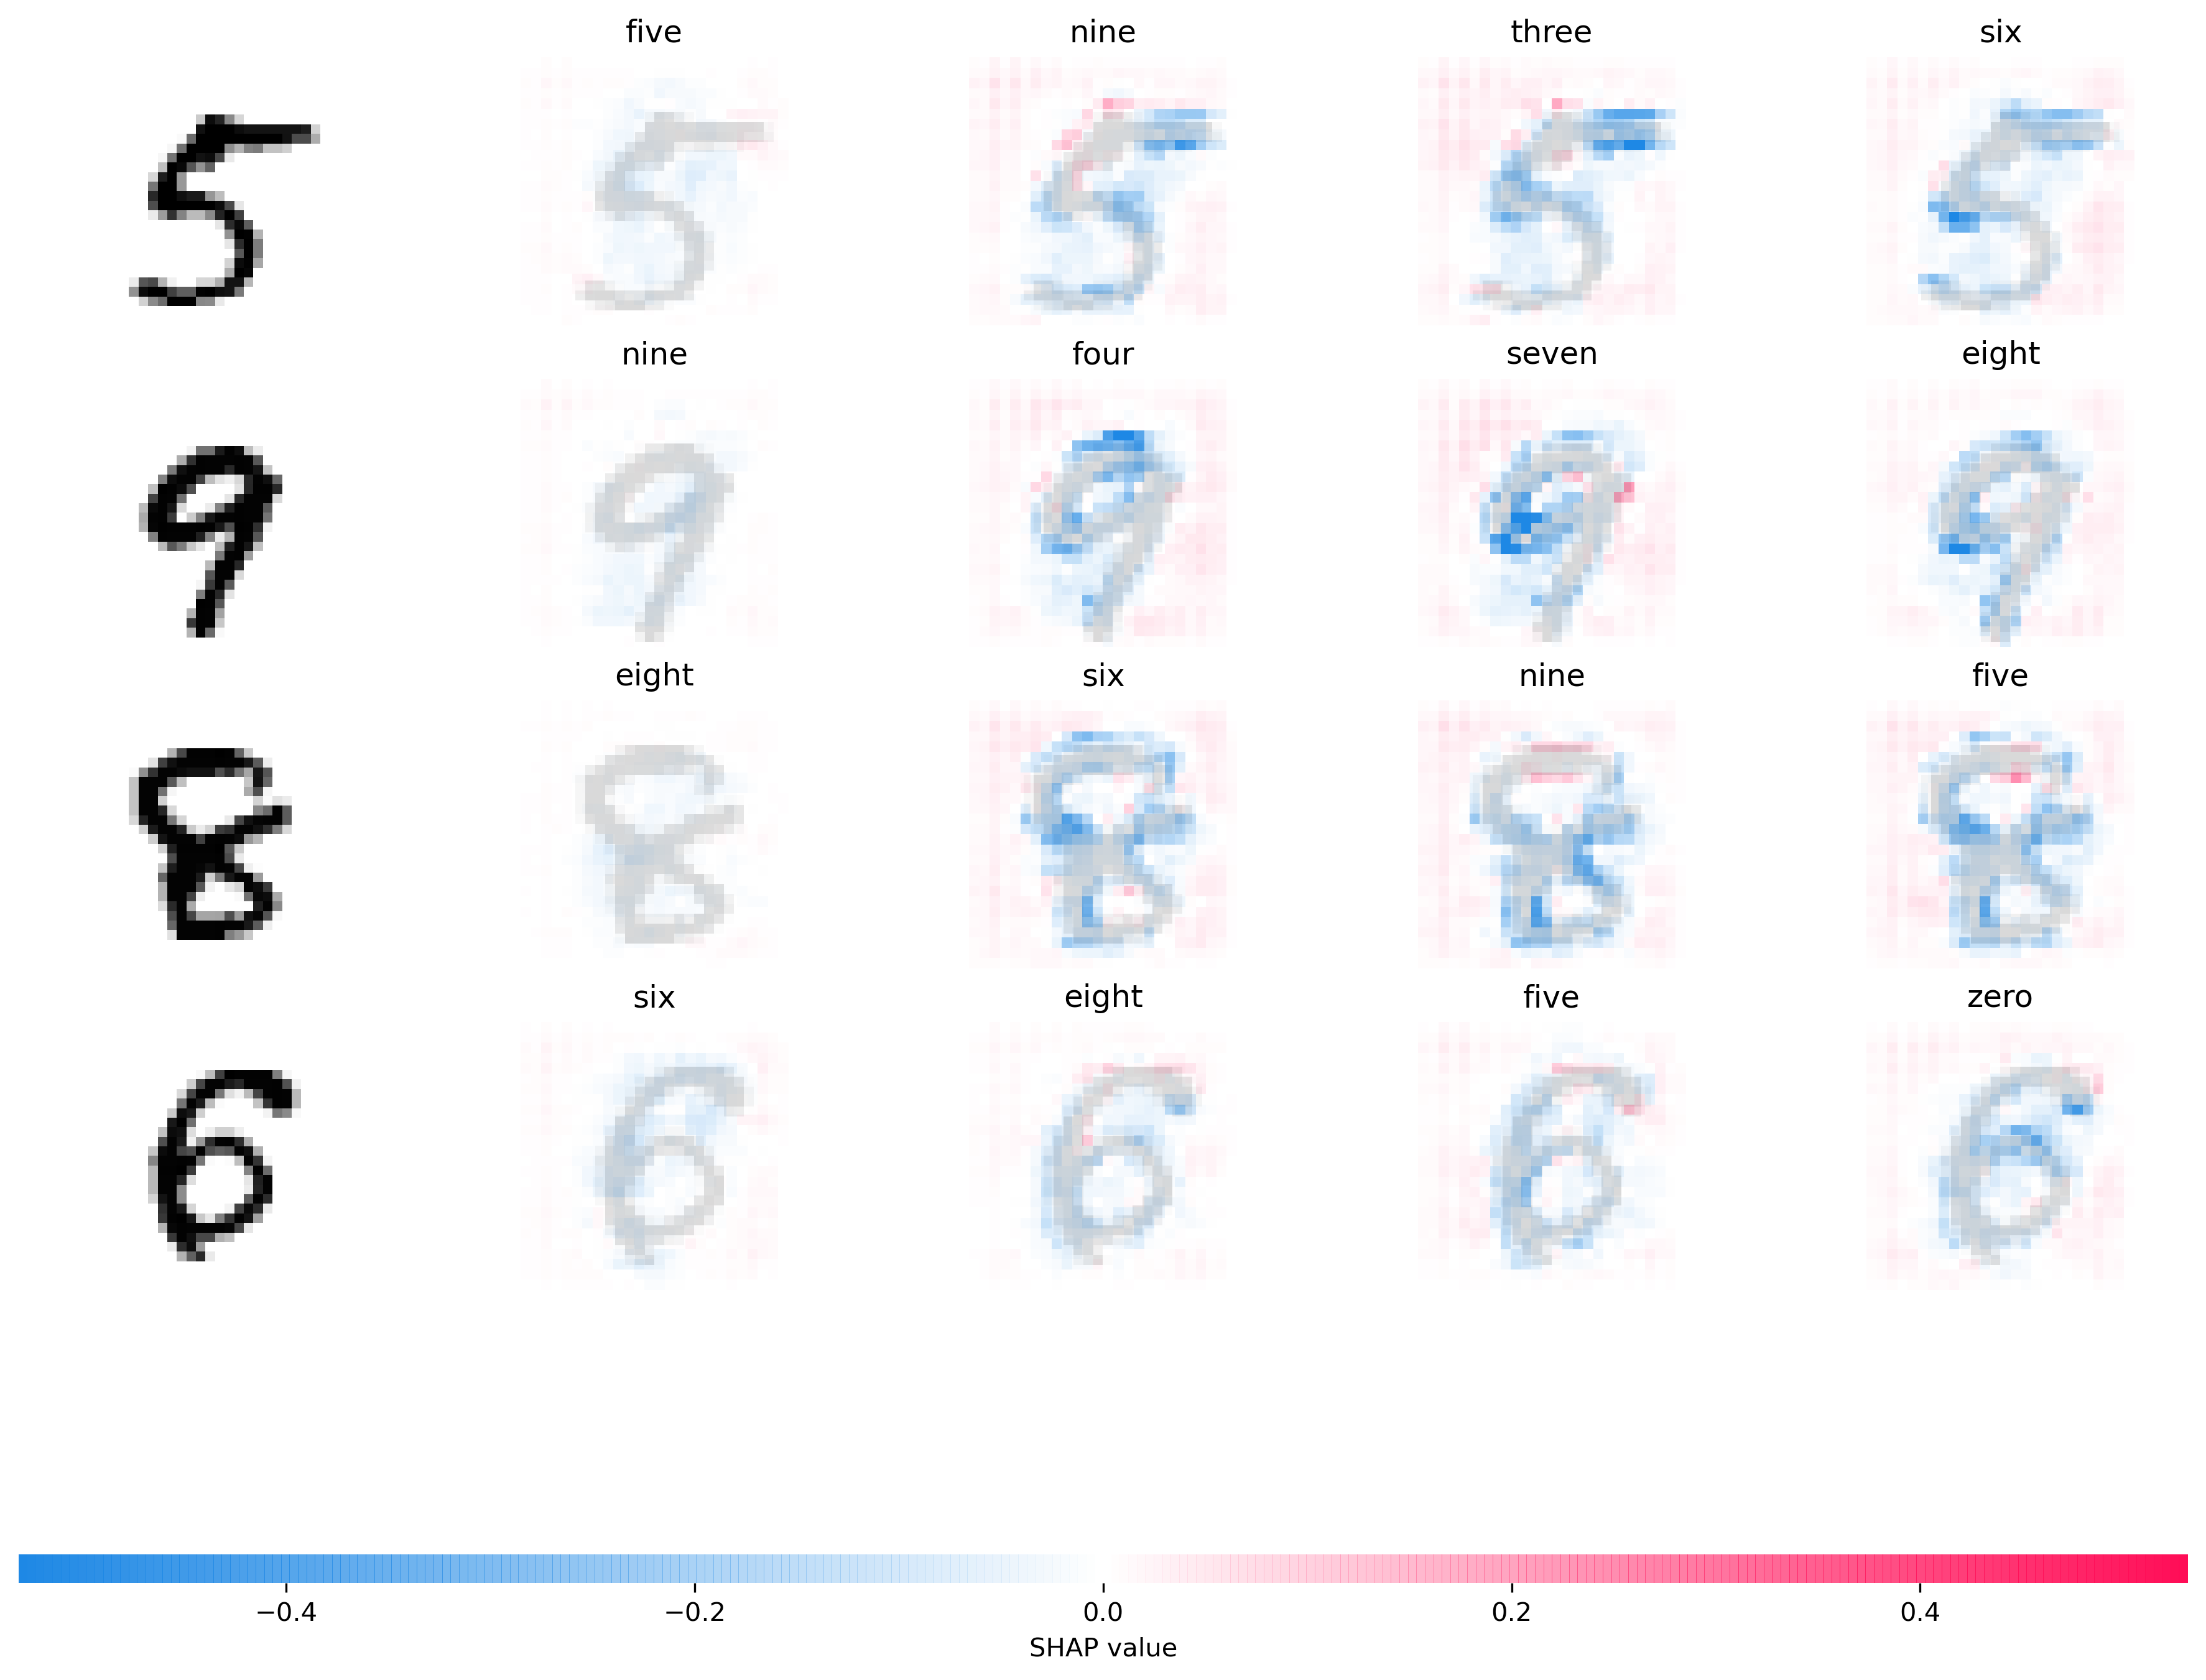

In [181]:
shap.image_plot(shap_values, -to_explain, index_names)

In [178]:
images = background.to(device)
to_explain = images[[3, 12, 18, 22]]
e = shap.GradientExplainer((model, model.conv2), images)
shap_values,indexes = e.shap_values(to_explain, ranked_outputs=4, nsamples=200)

In [179]:
class_names= ["zero", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine"]
index_names = np.vectorize(lambda x: class_names[x])(indexes.cpu().numpy())

shap_values = [np.swapaxes(np.swapaxes(s, 1, -1), 1, 2) for s in shap_values]
to_explain = np.swapaxes(np.swapaxes(to_explain.cpu().numpy(), 1, -1), 1, 2)

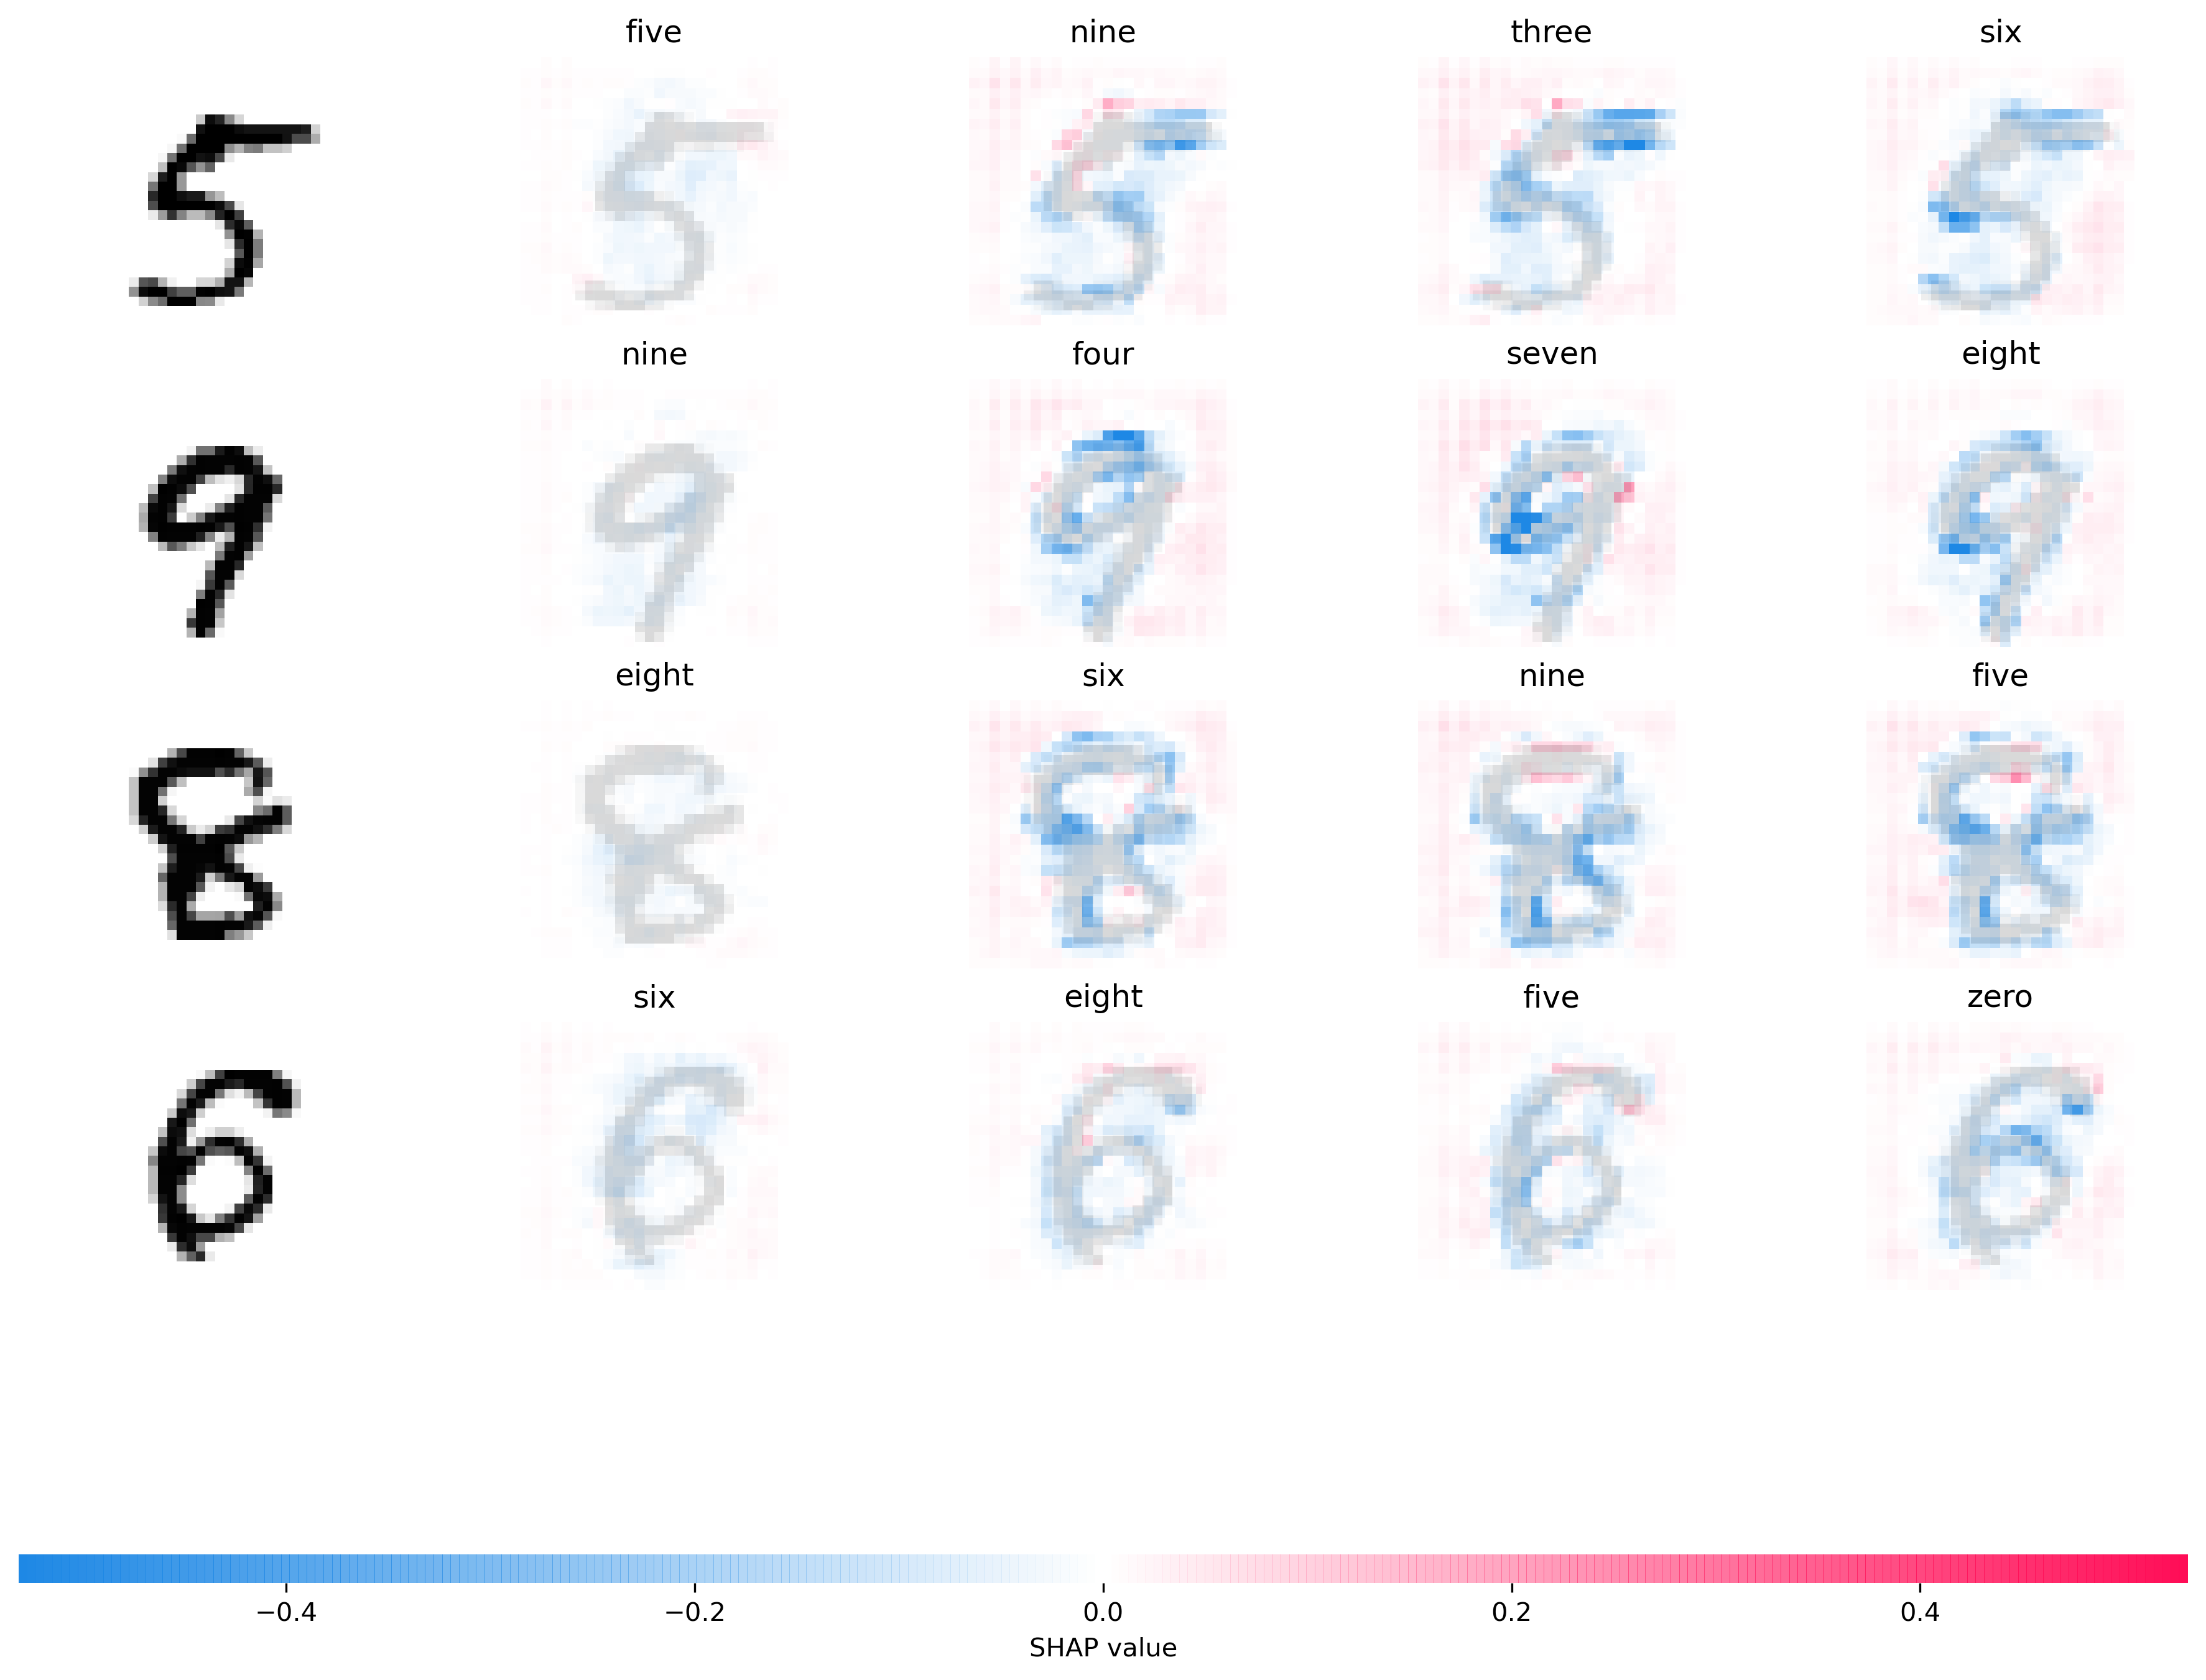

In [182]:
shap.image_plot(shap_values, -to_explain, index_names)